In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv("../data/FuelConsumption.csv")


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


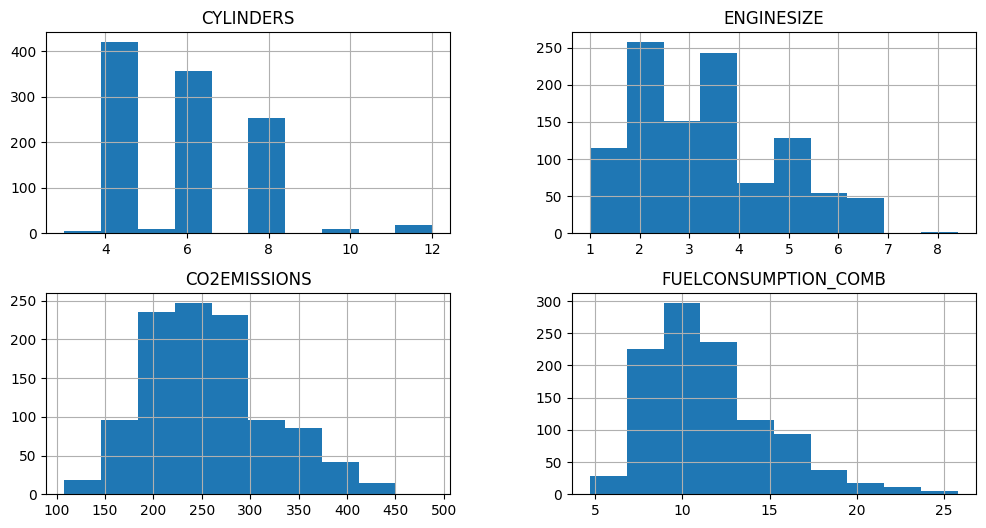

In [5]:
plt.rcParams['figure.figsize'] = (12,6)

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

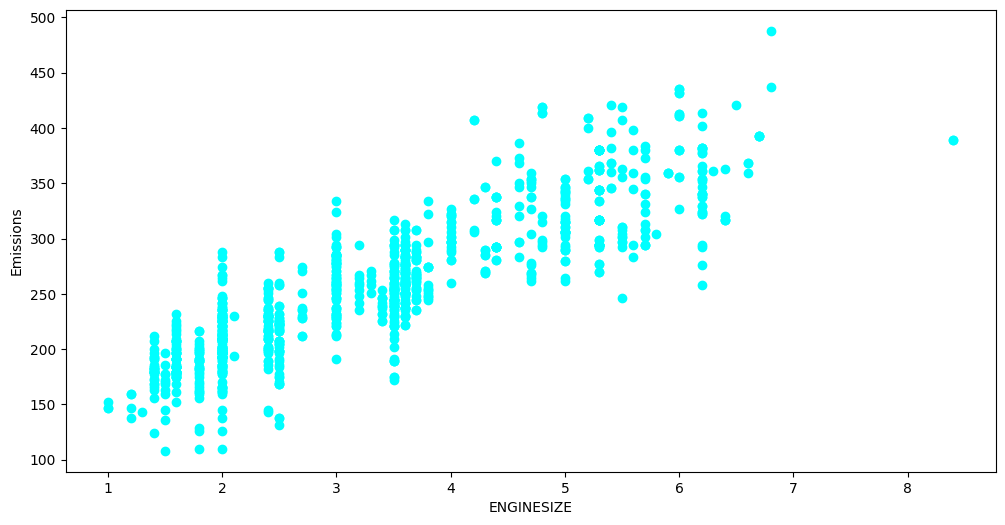

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="cyan")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

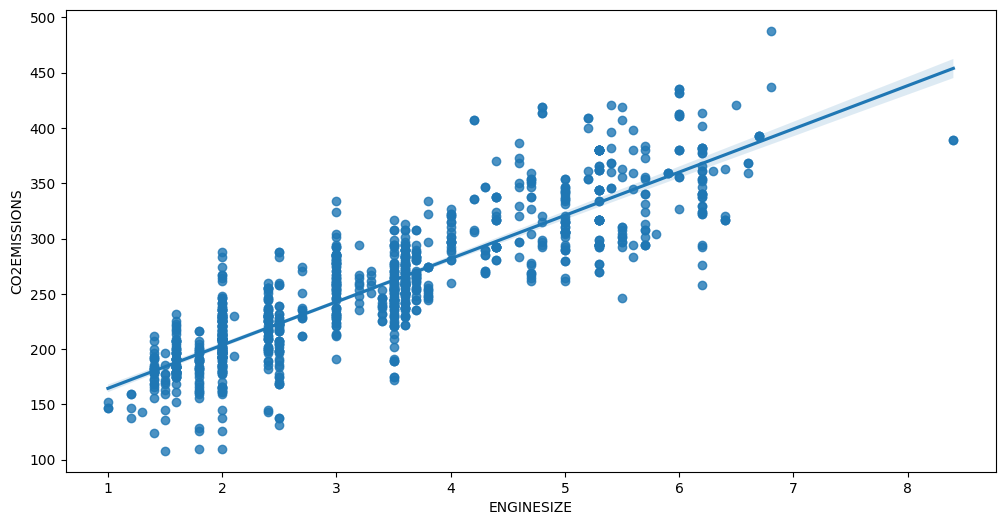

In [7]:
import seaborn as sns

sns.regplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])

In [10]:
from sklearn.model_selection import train_test_split 
train, test=train_test_split(df, test_size=0.2)

- In polimik regresyon, the relationship between the indepented variable x and the dependent variable y is modeled as nth depree polynominal in x.

2nd degree: y=b+ teta1 x + teta2 x^2

For example, the original feature set has only one feature: ENGINESIZE
If we select the degree of the polimik to be 2:
It generates 3 features: degree=0, degree=1, degree=2


In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])

test_x=np.asanyarray(test[["ENGINESIZE"]])
test_Y=np.asanyarray(test[["CO2EMISSIONS"]])

poly=PolynomialFeatures(degree=2)


In [ ]:
#Örneğin, birinci dereceden polinom regresyonunda, x verileri x^0, x^1 gibi ifadelerle genişletilebilir.
#İkinci dereceden polinom için x^2, üçüncü dereceden polinom için x^3 gibi yeni özellikler eklenir.

In [15]:
#Bu artık bir obje ve class'ın methodlarını çağırabiliriz
# x değerleri aldı degreye göre işlem yaptı
train_x_poly=poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.    2.    4.  ]
 [ 1.    5.   25.  ]
 [ 1.    2.    4.  ]
 ...
 [ 1.    2.    4.  ]
 [ 1.    1.6   2.56]
 [ 1.    3.5  12.25]]


- Transformed data looks like feature sets of multiple linear regression analysis
y =teta0 + teta1 x1 + teta2 x2
- Polimik regresyon is a special case of linear regresyon, with selection your features. 

In [16]:
from sklearn import linear_model

clf=linear_model.LinearRegression()

In [17]:
train_y_=clf.fit(train_x_poly, train_y)

# The coefficient 
print("Coefficients: ",clf.coef_)
print("Intercept:",clf.intercept_)

Coefficients:  [[ 0.         50.73976689 -1.58945153]]
Intercept: [106.60822994]


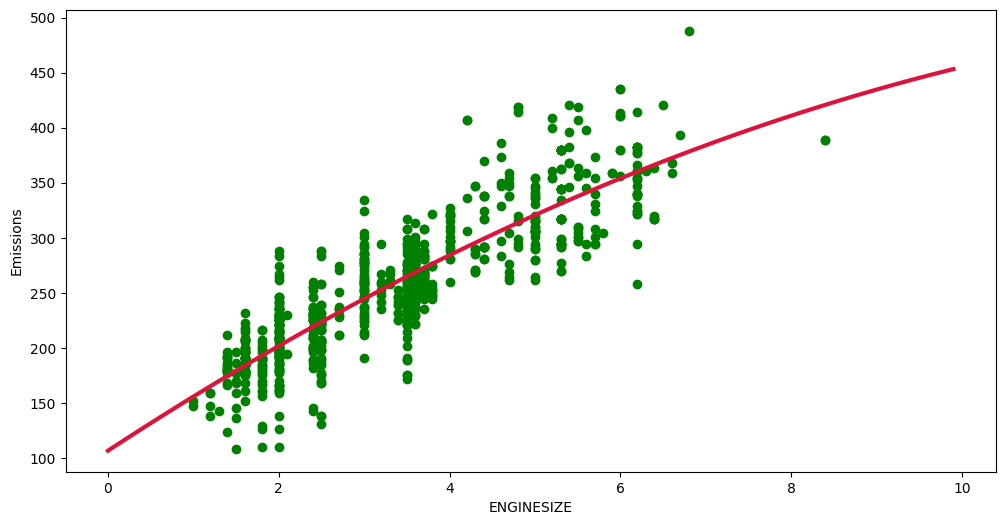

In [19]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color="green")
xx=np.arange(0.0,10,0.1)
yy=clf.intercept_[0]+clf.coef_[0][1] * xx +clf.coef_[0][2] * np.power(xx,2)
plt.plot(xx,yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

# Evaluation
